# 프로그래밍 언어 순위

Tiobe index에서 프로그래밍 언어의 인기 순위를 크롤링하여 워드클라우드로 출력

In [3]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.tiobe.com/tiobe-index/'
re = requests.get(url)
soup = BeautifulSoup(re.text, 'html.parser')

print(soup.title.get_text())

TIOBE Index - TIOBE


In [10]:
elem = soup.select_one('#top20>tbody>tr')
print(elem.select('td')[4].get_text())
print(elem.select('td')[5].get_text())

Python
12.46%


In [20]:
elem = soup.select('#top20>tbody>tr')

data = {}
for e in elem:
    lang = e.select('td')[4].get_text()
    rating = e.select('td')[5].get_text()
    rating = float(rating.replace('%',''))
    #print(lang, rating, type(rating))
    
    data[lang] = rating
data

{'Python': 12.46,
 'C': 12.37,
 'C++': 11.36,
 'Java': 11.28,
 'C#': 6.71,
 'Visual Basic': 3.34,
 'JavaScript': 2.82,
 'PHP': 1.74,
 'SQL': 1.47,
 'Assembly language': 1.29,
 'Delphi/Object Pascal': 1.26,
 'MATLAB': 1.11,
 'Scratch': 1.02,
 'Go': 1.0,
 'Fortran': 0.99,
 'Classic Visual Basic': 0.96,
 'R': 0.94,
 'Ruby': 0.94,
 'Swift': 0.93,
 'Rust': 0.91}

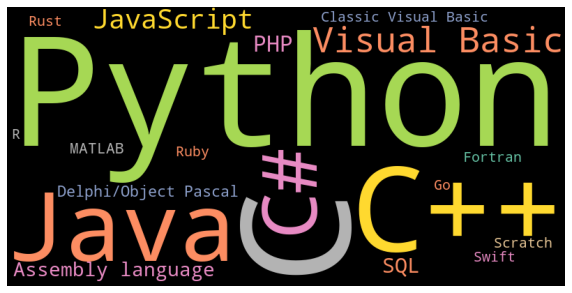

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(colormap = 'Set2',
                      width = 800, height = 400
                     ).generate_from_frequencies(data)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()